# Dispersion

In [1]:
cd ../../src/NonlinearOptics/

/home/fpresutti/src/NonlinearOptics


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import ifft, fftshift

from nonlinearmedium import Chi2PDC, Chi3

In [3]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = [9, 6]

# Test the effect of $\beta_i$ coefficients on the pulse propagation

We will test that:
- a positive $\beta_1$ propagates a pulse forward in time.
- a negative $\beta_1$ propagates a pulse backward in time.
- a positive $\beta_2$ (normal group velocity dispersion) chirps the pulse such that higher frequencies lag and lower frequencies lead.
- a negative $\beta_2$ (anomalous group velocity dispersion) chirps the pulse such that higher frequencies lead and lower frequencies lag.

Define a medium with positive $\beta_1, \beta_2$ in the pump channel and $\beta_1, \beta_2$ in the signal channel.
We will not have any nonlinear interactions between the two modes.

## Group velocity and Walkoff

In [4]:
medium = Chi2PDC(relativeLength=5,
                 nlLength=np.inf,
                 beta2=1,
                 beta2s=-1,
                 pulseType=0,
                 beta1=4,
                 beta1s=-4,
                 tPrecision=2048, zPrecision=100, tMax=50)

medium.runPumpSimulation()

Check the pump propagation:

<IPython.core.display.Javascript object>


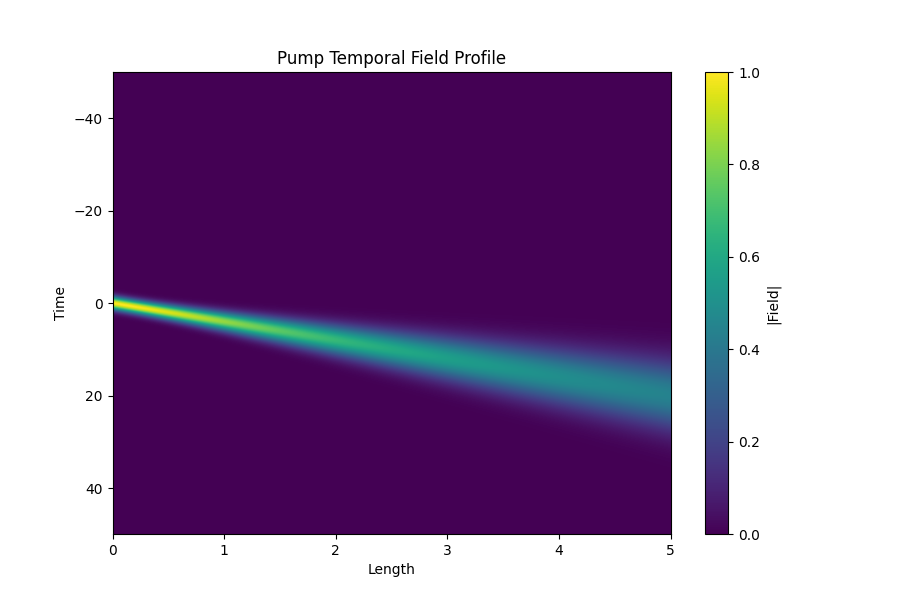

In [5]:
plt.figure()
plt.imshow(np.abs(fftshift(medium.pumpTime, axes=1)).T, aspect="auto",
           extent=[0, 5, np.max(medium.tau), np.min(medium.tau)])
plt.colorbar().set_label("|Field|")
plt.title("Pump Temporal Field Profile")
plt.ylabel("Time")
plt.xlabel("Length");

We see that the pulse has moved by $\Delta T = \beta_1 L = 20$

To visualize the chirp modulate by a complex exponential

<IPython.core.display.Javascript object>


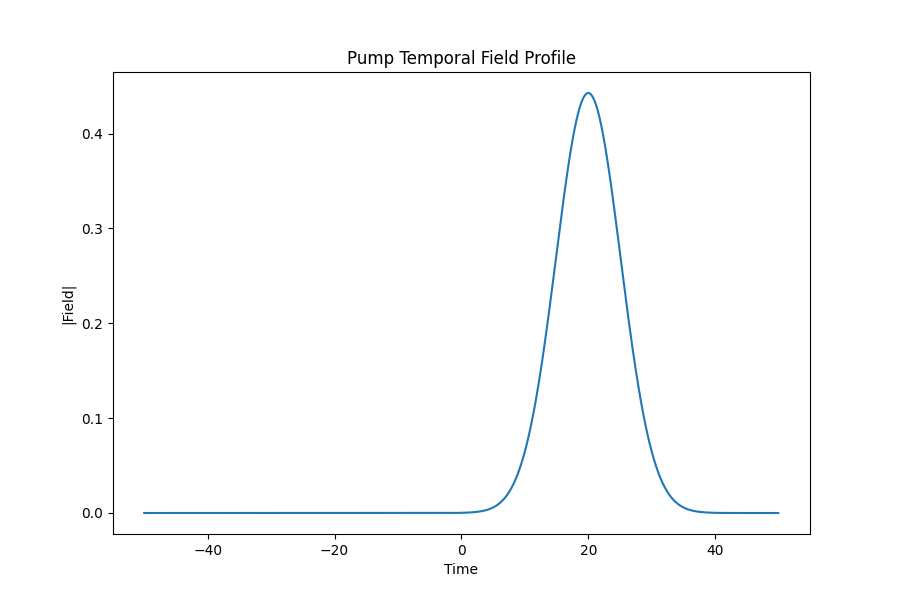

In [6]:
plt.figure()
plt.plot(fftshift(medium.tau), fftshift(np.abs(medium.pumpTime[-1])))
plt.title("Pump Temporal Field Profile")
plt.ylabel("|Field|")
plt.xlabel("Time");

Same for signal, but we had flipped the sign the value of $\beta_1$.

In [7]:
medium.runSignalSimulation(np.exp(-0.5 * medium.tau**2))

<IPython.core.display.Javascript object>


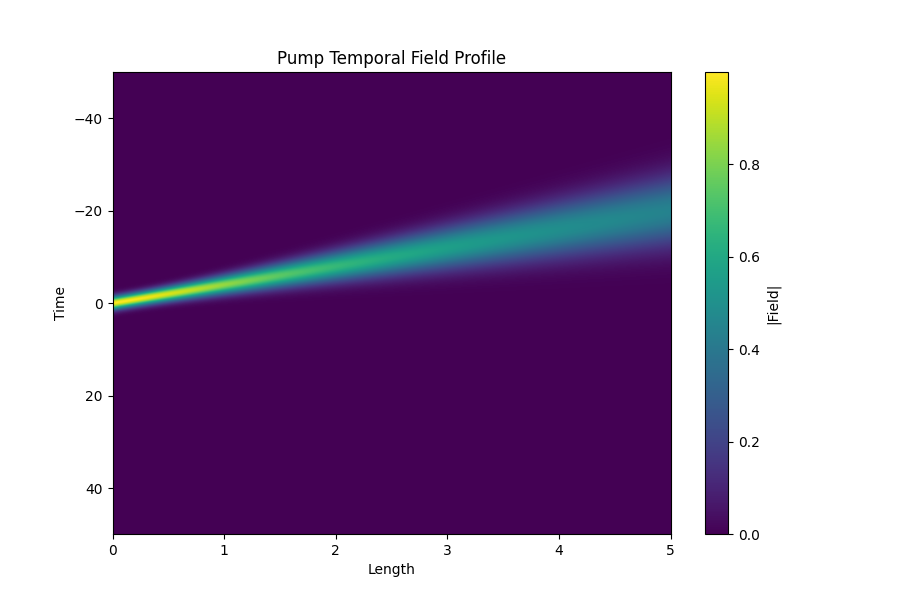

In [8]:
plt.figure()
plt.imshow(np.abs(fftshift(medium.signalTime, axes=1)).T, aspect="auto",
           extent=[0, 5, np.max(medium.tau), np.min(medium.tau)])
plt.colorbar().set_label("|Field|")
plt.title("Pump Temporal Field Profile")
plt.ylabel("Time")
plt.xlabel("Length");

<IPython.core.display.Javascript object>


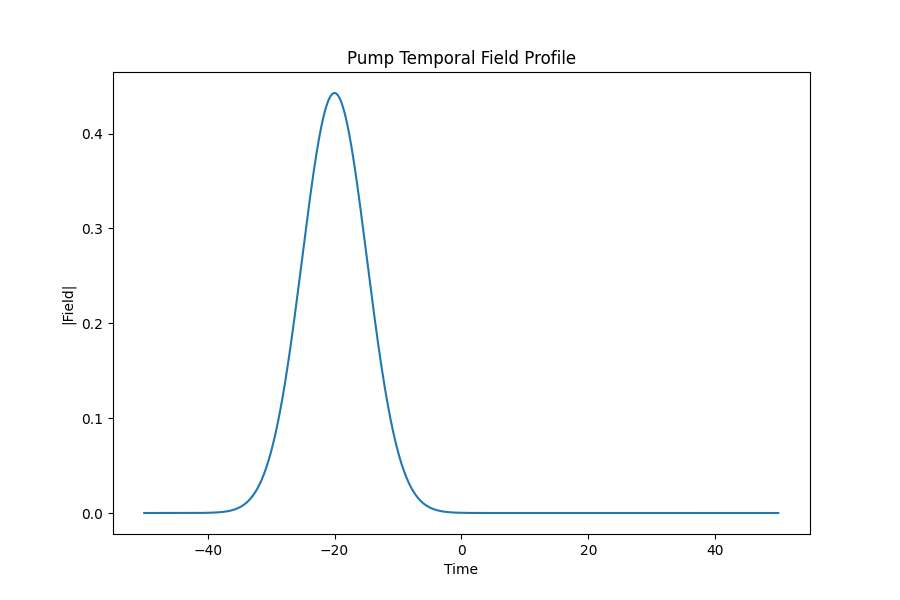

In [9]:
plt.figure()
plt.plot(fftshift(medium.tau), fftshift(np.abs(medium.signalTime[-1])))
plt.title("Pump Temporal Field Profile")
plt.ylabel("|Field|")
plt.xlabel("Time");

# Group velocity dispersion

We can also test the group velocity dispersion, $\beta_2$, by detuning the pulse from the central frequency.
With normal dispersion, we expect higher frequencies to propagate slower and vice versa.

In [10]:
fiber = Chi3(relativeLength=5,
             nlLength=np.inf,
             beta2=1,
             pulseType=0,
             tPrecision=2048, zPrecision=100, tMax=50)

detuned = np.exp(-0.5 * (fiber.omega - 4)**2) * np.sqrt(2048)
fiber.runSignalSimulation(ifft(detuned))

<IPython.core.display.Javascript object>


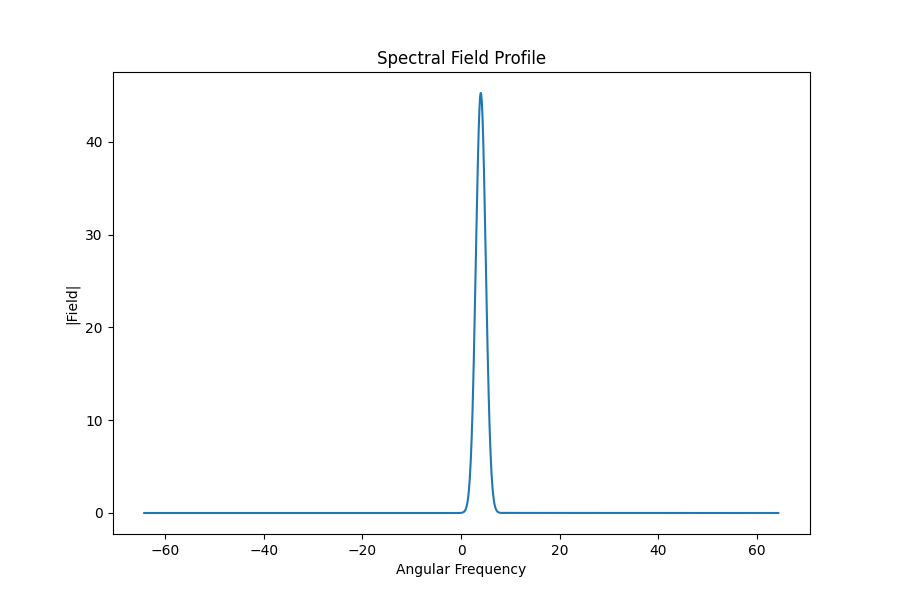

In [11]:
plt.figure()
plt.plot(fftshift(fiber.omega), fftshift(detuned))
plt.title("Spectral Field Profile")
plt.xlabel("Angular Frequency")
plt.ylabel("|Field|");

We expect the delay to be $\Delta T = \tfrac12 \beta_2 \omega^2 L = 20$

<IPython.core.display.Javascript object>


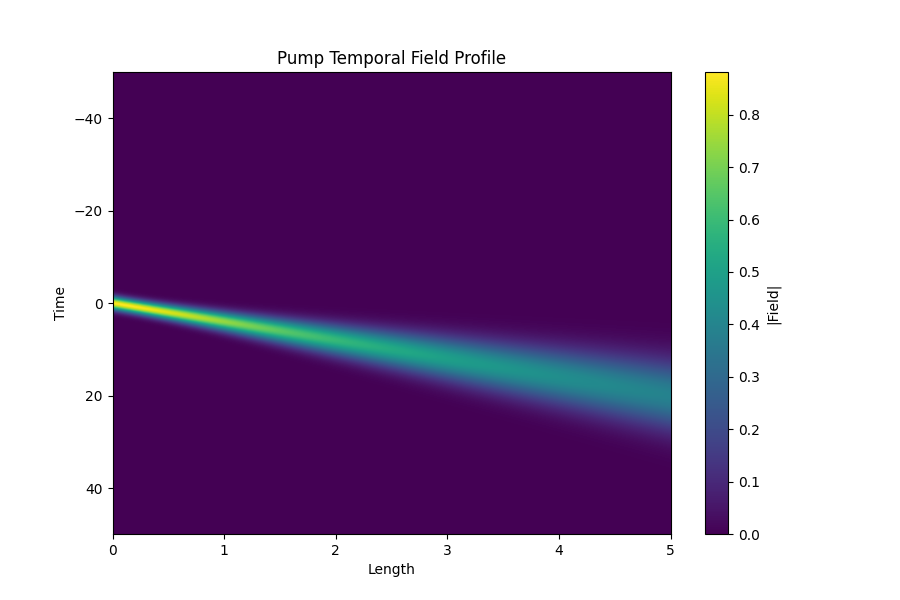

In [12]:
plt.figure()
plt.imshow(np.abs(fftshift(fiber.signalTime, axes=1)).T, aspect="auto",
           extent=[0, 5, np.max(fiber.tau), np.min(fiber.tau)])
plt.colorbar().set_label("|Field|")
plt.title("Pump Temporal Field Profile")
plt.ylabel("Time")
plt.xlabel("Length");

<IPython.core.display.Javascript object>


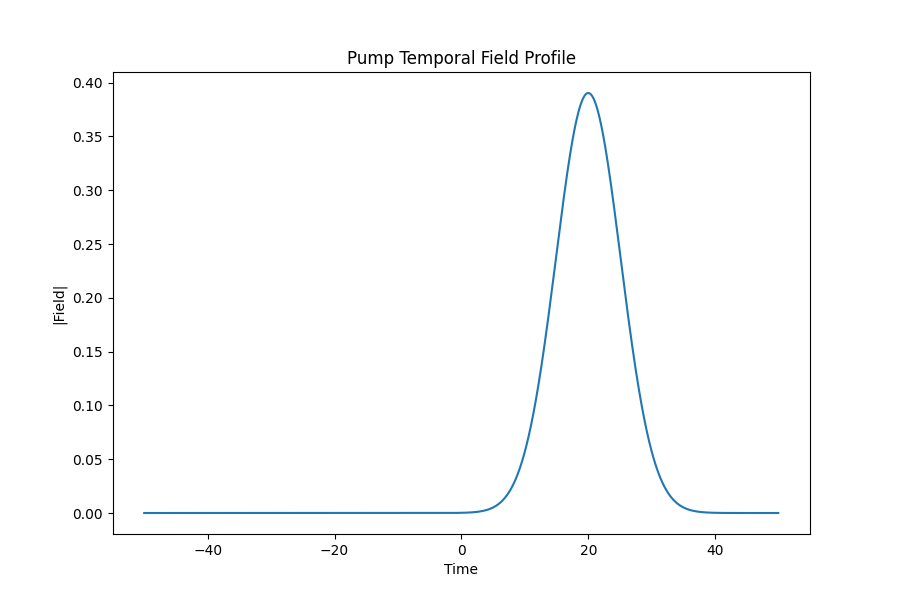

In [13]:
plt.figure()
plt.plot(fftshift(fiber.tau), fftshift(np.abs(fiber.signalTime[-1])))
plt.title("Pump Temporal Field Profile")
plt.ylabel("|Field|")
plt.xlabel("Time");

# Dispersion Length
The temporal profile of a Gaussian pulse should widen as it propagates.
The $\mathrm{e}^{-1}$ width depends on the propagation length and the dispersion length $L_D = T_0^2 / |\beta_2|$.
From Agrawal, Nonlinear Fiber Optics Eq 3.2.11 p.55, $T(z) = T_0 (1 + (z/L_d)^2)^{1/2}$.

In [14]:
fiber.runPumpSimulation()

<IPython.core.display.Javascript object>


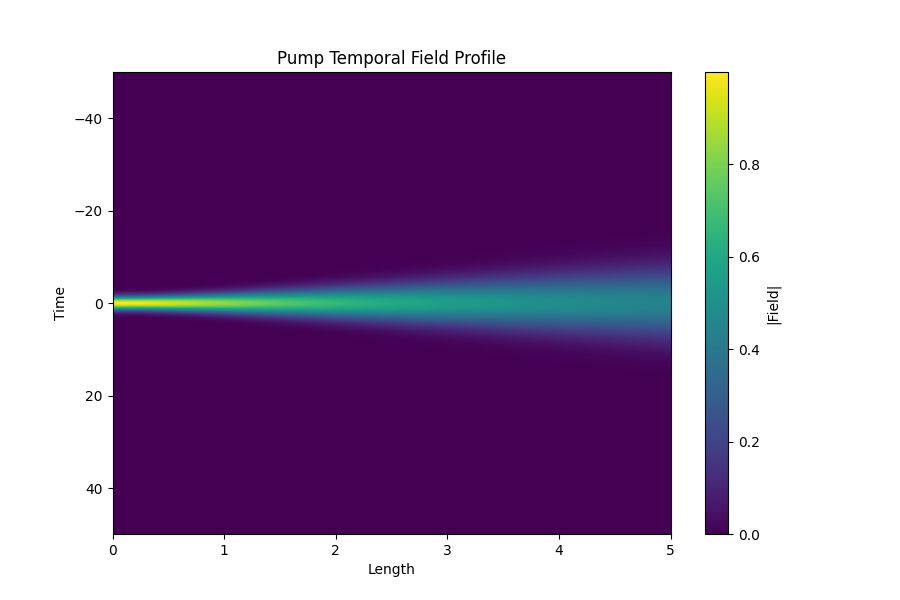

In [15]:
plt.figure()
plt.imshow(np.abs(fftshift(fiber.pumpTime, axes=1)).T, aspect="auto",
           extent=[0, 5, np.max(fiber.tau), np.min(fiber.tau)])
plt.colorbar().set_label("|Field|")
plt.title("Pump Temporal Field Profile")
plt.ylabel("Time")
plt.xlabel("Length");

<IPython.core.display.Javascript object>


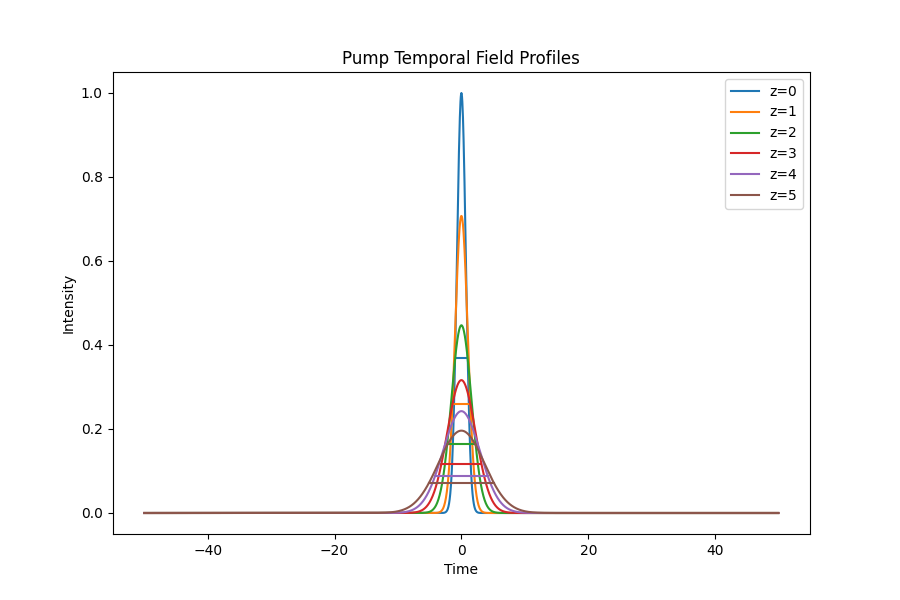

In [16]:
plt.figure()
for i in range(6):
  profile = np.abs(fiber.pumpTime[int((fiber.pumpTime.shape[0]-1) * i / 5)])**2
  color = next(plt.gca()._get_lines.prop_cycler)["color"]
  p = plt.plot(fftshift(fiber.tau), fftshift(profile), label="z="+str(i), color=color)
  plt.plot(np.sqrt(1 + i**2) * np.array([-1, 1]),
           [np.exp(-1) * np.max(profile), np.exp(-1) * np.max(profile)], color=color)
plt.title("Pump Temporal Field Profiles")
plt.ylabel("Intensity")
plt.xlabel("Time")
plt.legend();

# Tests of third order dispersion

Comparing to Agrawal, Nonlinear Fiber Optics, Figure 3.6, p.64.
Perform one simulation with $\beta_2 = 0$ and one with the $\beta_3$ dispersion length equal to the $\beta_2$ dispersion length.

In [17]:
fiber1 = Chi3(relativeLength=5,
              nlLength=np.inf,
              beta2=1,
              beta3=1,
              pulseType=0,
              tPrecision=2048, zPrecision=200, tMax=45)

fiber1.runPumpSimulation()

fiber2 = Chi3(relativeLength=5,
              nlLength=np.inf,
              beta2=0,
              beta3=1,
              pulseType=0,
              tPrecision=2048, zPrecision=200, tMax=45)

fiber2.runPumpSimulation()

<IPython.core.display.Javascript object>


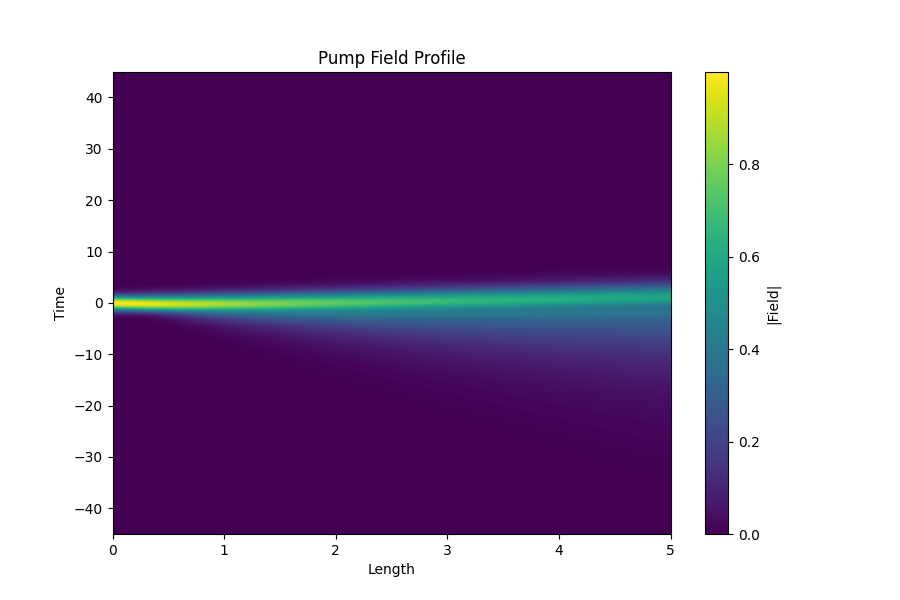

In [18]:
plt.figure()
plt.imshow(np.abs(fftshift(fiber1.pumpTime,axes=1)).T, aspect="auto",
           extent=[0, 5, np.min(fiber1.tau), np.max(fiber1.tau)])
plt.colorbar().set_label("|Field|")
plt.title("Pump Field Profile")
plt.ylabel("Time")
plt.xlabel("Length");

<IPython.core.display.Javascript object>


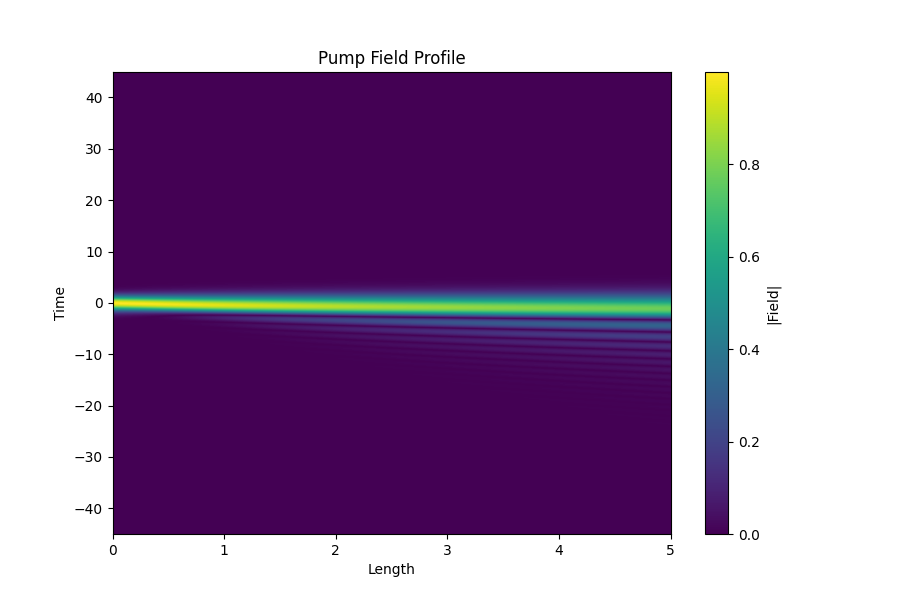

In [19]:
plt.figure()
plt.imshow(np.abs(fftshift(fiber2.pumpTime,axes=1)).T, aspect="auto",
           extent=[0, 5, np.min(fiber2.tau), np.max(fiber2.tau)])
plt.colorbar().set_label("|Field|")
plt.title("Pump Field Profile")
plt.ylabel("Time")
plt.xlabel("Length");

<IPython.core.display.Javascript object>


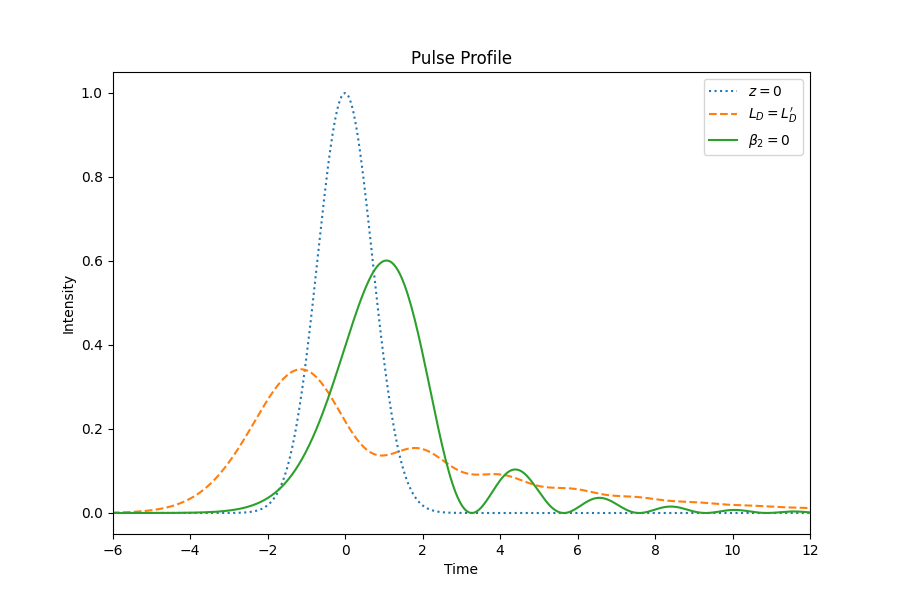

In [20]:
plt.figure()
plt.plot(fftshift(fiber1.tau), fftshift(np.abs(fiber1.pumpTime[0])**2), ":", label=r"$z=0$")
plt.plot(fftshift(fiber1.tau), fftshift(np.abs(fiber1.pumpTime[-1])**2), "--", label=r"$L_D = L_D'$")
plt.plot(fftshift(fiber2.tau), fftshift(np.abs(fiber2.pumpTime[-1])**2), "-", label=r"$\beta_2 = 0$")
plt.title("Pulse Profile")
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.xlim(-6, 12)
plt.legend();